CSV carregado!
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 2

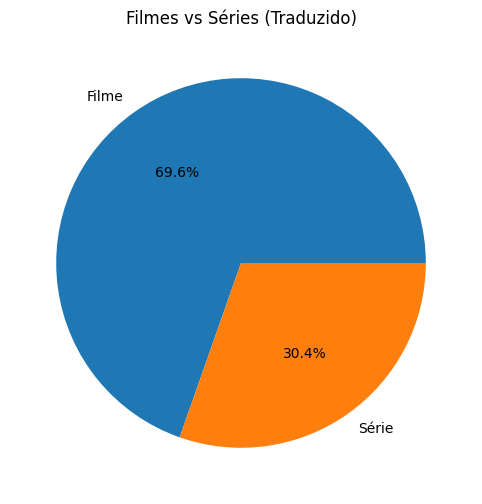

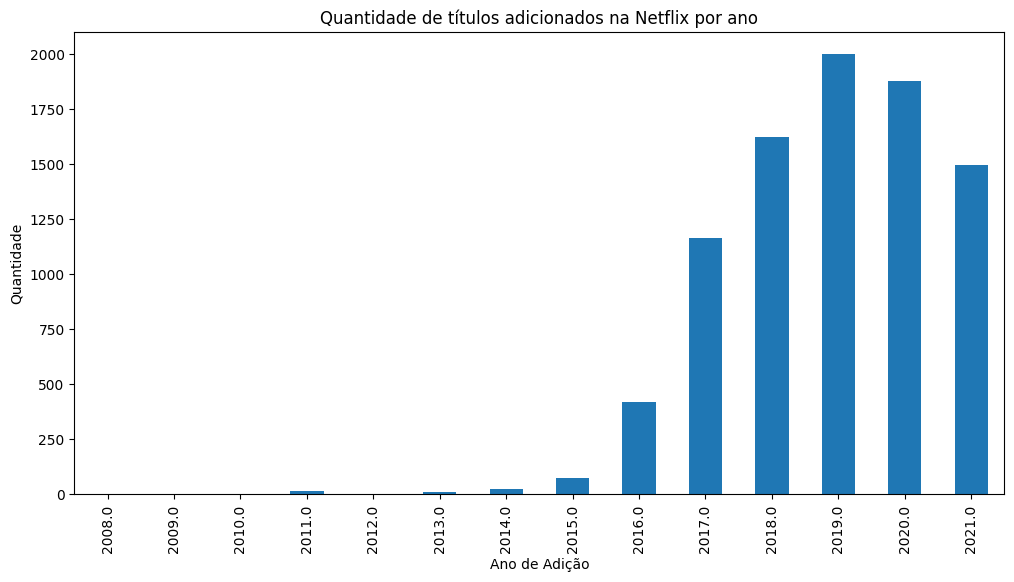

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)

# ----------------------
# CARREGAR CSV
# ----------------------
df = pd.read_csv("netflix_titles.csv")

print("CSV carregado!")
print(df.head())


# Gráfico 1
traduzir = {
    "Movie": "Filme",
    "TV Show": "Série"
}

df['type_traduzido'] = df['type'].map(traduzir)

plt.figure()
df['type_traduzido'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Filmes vs Séries (Traduzido)")
plt.ylabel("")
plt.show()




# GRÁFICO 2 


# Converter date_added para datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extrair o ano de adição
df['year_added'] = df['date_added'].dt.year

plt.figure()
df['year_added'].value_counts().sort_index().plot(kind='bar')
plt.title("Quantidade de títulos adicionados na Netflix por ano")
plt.xlabel("Ano de Adição")
plt.ylabel("Quantidade")
plt.show()


# ============================================================
# GRÁFICO 3 — Países com mais títulos
# ============================================================

plt.figure()
df['country'].dropna().str.split(', ', expand=True).stack().value_counts().head(10).plot(kind='bar')
plt.title("Top 10 países com mais títulos")
plt.xlabel("País")
plt.ylabel("Quantidade")
plt.show()


# ============================================================
# GRÁFICO 4 — Gêneros mais comuns
# ============================================================

plt.figure()
df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10).plot(kind='bar')
plt.title("Top 10 gêneros mais comuns na Netflix")
plt.xlabel("Gênero")
plt.ylabel("Quantidade")
plt.show()
